In [1]:
from Nozzle_1D import Nozzle
temp = Nozzle("inputs.nml")
import matplotlib.pyplot as plt

In [2]:
temp.set_geometry()
temp.set_initial_conditions()
temp.set_boundary_conditions()
temp.set_conserved_variables()
temp.set_primitive_variables()
temp.set_source_term()


In [21]:
for t in range(500):
    temp.iteration_step()
    temp.update_all()

/home/aaron99/src/CFD/AOE_6145/CFD/CFD_HW2/Nozzle_1D.py:75: RuntimeWarning: overflow encountered in multiply
  self.F[1:-1] = np.array([self.rho*self.u,self.rho*self.u**2+self.p,self.rho*self.u*ht]).T
/home/aaron99/src/CFD/AOE_6145/CFD/CFD_HW2/Nozzle_1D.py:98: RuntimeWarning: invalid value encountered in add
  F_plus_1_2 = (self.F[i+2]+self.F[i+1])/2
/home/aaron99/src/CFD/AOE_6145/CFD/CFD_HW2/Nozzle_1D.py:99: RuntimeWarning: invalid value encountered in add
  F_minus_1_2 = (self.F[i]+self.F[i+1])/2
/home/aaron99/src/CFD/AOE_6145/CFD/CFD_HW2/Nozzle_1D.py:104: RuntimeWarning: invalid value encountered in subtract
  self.U[i] = self.U[i]-( F_plus_1_2*A_plus_1_2-F_minus_1_2*A_minus_1_2 -self.S[i]*deltax)*self.delta_t/(Volume)
/home/aaron99/src/CFD/AOE_6145/CFD/CFD_HW2/Nozzle_1D.py:114: RuntimeWarning: overflow encountered in multiply
  self.p = (self.gamma - 1) * (self.U[:,2] - 0.5 * self.rho * self.u**2)  # Pressure
/home/aaron99/src/CFD/AOE_6145/CFD/CFD_HW2/Nozzle_1D.py:75: RuntimeWarnin

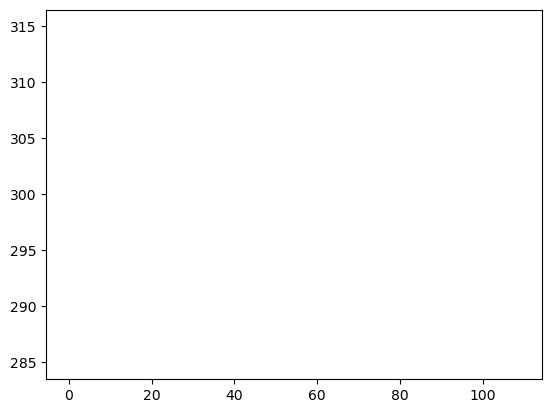

In [22]:
plt.plot(temp.p)

In [5]:
import numpy as np

In [6]:
def T(gamma,M,T0):
    return T0/psi(gamma,M)

def P(gamma,M,P0):
    return P0/(psi(gamma,M)**(gamma/(gamma-1)))
def rho(P,R,T):
    return P/(R*T)
def u(gamma,M,R,T):
    return M*np.sqrt(gamma*R*T)

def psi(gamma,M):
    return 1+((gamma-1)/2)*M**2
def conserved_to_primitive(U, gamma=1.4):
    rho = U[0]  # Density
    u = U[1] / rho  # Velocity
    p = (gamma - 1) * (U[2] - 0.5 * rho * u**2)  # Pressure

    return np.array([rho, u, p])
def primitive_to_conserved(V,gamma=1.4):
    pass
def set_boundary_conditions():
    pass

In [7]:
# Case 1
NI = 11
p0 = 300 #kPa
T0 = 600 #K
Ru = 8314
M = 28.97 
R = Ru/M
p_inf = 101 #kpa
T_inf = 293 #K
x = np.linspace(-1,1,NI)
A = np.zeros((x.shape[0]+2))
A[1:-1] = .2+.4*(1+np.sin(np.pi*(x-.5)))
A[0] = 2*A[1]-A[2]
A[-1] = 2*A[-2]-A[-3]

A = (A[1:] + A[0:-1])/2 # A is half values

p = np.zeros(NI-1)+p_inf # plus ghost nodes
u = np.zeros_like(p)
rho = np.zeros_like(p)+p_inf/(R*T_inf)
deltat = .0000001
deltax = x[1]-x[0]
S = np.zeros((3,NI+2))
gamma = 1.4



In [8]:
u.shape

(10,)

In [9]:
rho.shape

(10,)

In [10]:
T = p/(rho*R)
et = (R/(gamma-1))*T+.5*(u**2)
ht = (gamma*R/(gamma-1))*T+.5*u**2
F = np.zeros((u.shape[0]+2,3))
U = np.zeros_like(F)
U[1:-1] = np.array([rho,rho*u,rho*et]).T
F[1:-1] = np.array([rho*u,rho*u**2+p,rho*u*ht]).T
V = np.zeros_like(U)


In [11]:
rho.shape

(10,)

In [12]:
# Extrapolate ghost nodes
F[0] = 2*F[1]-F[2]
F[-1] = 2*F[-2]-F[-3]

U[0] = 2*U[1]-U[2]
U[-1] = 2*U[-2]-U[-3]

A[0] = 2*A[1]-A[2]
A[-1] = 2*A[-2]-A[-3]

In [13]:
def primitive_to_conserved(V,gamma=1.4,R=1):
    T = p/(rho*R)
    et = (R/(gamma-1))*T+.5*(u**2)
    ht = (gamma*R/(gamma-1))*T+.5*u**2
    U = np.array([rho,rho*u,rho*et]).T
    F = np.array([rho*u,rho*u**2+p,rho*u*ht]).T
    V = np.zeros_like(U)


In [14]:
A.shape

(12,)

In [15]:
S = np.zeros_like(F)
for i in range(NI-1):
    #S[i+1,1]=p[i]*(A[i+1]-A[i])
    S[i+1,1]=p[i]*0.4 * np.pi * np.cos(np.pi * (x[i] - 0.5))


In [16]:
S.shape

(12, 3)

In [17]:
A

array([1.1      , 0.9618034, 0.8236068, 0.6      , 0.3763932, 0.2381966,
       0.2381966, 0.3763932, 0.6      , 0.8236068, 0.9618034, 1.1      ])

In [18]:
for t in range(1000):
    for i in range(1,NI):
        Volume = (A[i])*deltax/2
        U[i] = U[i]-(F[i+1]*A[i+1]-F[i-1]*A[i-1] -S[i]*deltax)*deltat/(Volume)
        V[i]=conserved_to_primitive(U[i])
    F[0] = 2*F[1]-F[2]
    F[-1] = 2*F[-2]-F[-3]

    U[0] = 2*U[1]-U[2]
    U[-1] = 2*U[-2]-U[-3]
    V[-1] = conserved_to_primitive(U[-1])
    V[0] = conserved_to_primitive(U[0])



    rho = V[:,0]
   # print(rho)
    u = V[:,1]
    p = V[:,2]
    p[1] = p0
    p[-2] = p_inf
    rho[1] = p0/(R*T0)
    for i in range(NI-1):
        S[i+1,1]=p[i]*0.4 * np.pi * np.cos(np.pi * (x[i] - 0.5))
    


    
    T = p/(rho*R)
    et = (R/(gamma-1))*T+.5*(u**2)
    ht = (gamma*R/(gamma-1))*T+.5*u**2
    U = np.array([rho,rho*u,rho*et]).T
    F = np.array([rho*u,rho*u**2+p,rho*u*ht]).T
    print(p)


[100.99999983 300.         100.99999989 100.9999998  100.99999982
 101.         100.99999943 100.99999945 100.9999998  100.99999996
 101.         100.99999998]
[498.99999383 300.         100.99999851 101.00000099 101.00000615
 101.00001302 101.00000792 101.00000001 100.99999737 100.9999987
 101.         101.0000013 ]
[498.9998175  300.         100.99998574 101.00003537 101.00001901
 101.00003906 101.00002548 101.00000169 100.99999273 100.99999622
 101.         101.00000385]
[499.00008451 300.         101.00008973 101.00010294 101.00003837
 101.00007812 101.00005211 101.00000447 100.99998587 100.99999251
 101.         101.00000761]
[499.00022852 300.         101.00031047 101.00020369 101.00006426
 101.0001302  101.00008781 101.00000837 100.9999768  100.99998758
 101.         101.0000126 ]
[499.00024953 300.         101.00064797 101.00033763 101.00009666
 101.0001953  101.00013257 101.00001338 100.9999655  100.99998142
 101.         101.00001881]
[499.00014754 300.         101.00110223 1

In [19]:
import matplotlib.pyplot as plt

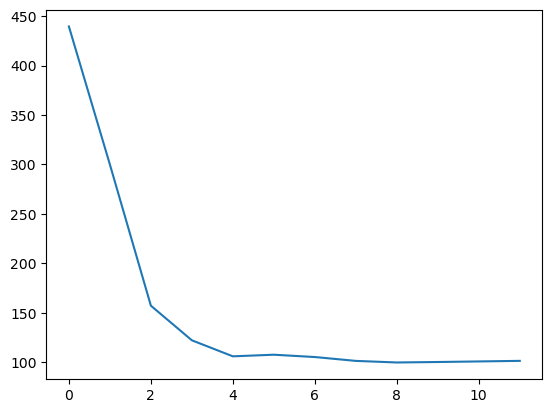

In [20]:
plt.plot(p)